In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv('telecom_churn_data.csv')

In [3]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

In [4]:
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
set(churn.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [6]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
#renaming these columns to more consistent names with month name as suffix
churn.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [8]:
numeric_cols = []
cat_cols = []
check_cols = []
for c in churn.columns: 
  if churn[c].dtype == "float64" or churn[c].dtype == "int64":
    if churn[c].max() > 1:
      numeric_cols.append(c)
    if churn[c].max() == 1 and churn[c].min() == 0:
      cat_cols.append(c)
    if churn[c].max() == 1 and churn[c].min() > 0:
      check_cols.append(c)

In [9]:
churn[numeric_cols].describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.0

In [10]:
missing_val = pd.DataFrame(100* churn[numeric_cols].isnull().sum()/churn[numeric_cols].shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0
onnet_mou_6,3.937039
onnet_mou_7,3.859039
onnet_mou_8,5.378054
onnet_mou_9,7.745077
offnet_mou_6,3.937039
offnet_mou_7,3.859039
offnet_mou_8,5.378054
offnet_mou_9,7.745077
roam_ic_mou_6,3.937039
roam_ic_mou_7,3.859039


In [11]:
numeric_month6_cols = churn[numeric_cols].columns[churn[numeric_cols].columns.str.contains('_6')]

missing_val = pd.DataFrame(100* churn[numeric_month6_cols].isnull().sum()/churn[numeric_month6_cols].shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0
onnet_mou_6,3.937039
offnet_mou_6,3.937039
roam_ic_mou_6,3.937039
roam_og_mou_6,3.937039
loc_og_t2t_mou_6,3.937039
loc_og_t2m_mou_6,3.937039
loc_og_t2f_mou_6,3.937039
loc_og_t2c_mou_6,3.937039
loc_og_mou_6,3.937039
std_og_t2t_mou_6,3.937039


In [12]:
numeric_month7_cols = churn[numeric_cols].columns[churn[numeric_cols].columns.str.contains('_7')]

missing_val = pd.DataFrame(100* churn[numeric_month7_cols].isnull().sum()/churn[numeric_month7_cols].shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0
onnet_mou_7,3.859039
offnet_mou_7,3.859039
roam_ic_mou_7,3.859039
roam_og_mou_7,3.859039
loc_og_t2t_mou_7,3.859039
loc_og_t2m_mou_7,3.859039
loc_og_t2f_mou_7,3.859039
loc_og_t2c_mou_7,3.859039
loc_og_mou_7,3.859039
std_og_t2t_mou_7,3.859039


In [13]:
numeric_month8_cols = churn[numeric_cols].columns[churn[numeric_cols].columns.str.contains('_8')]

missing_val = pd.DataFrame(100* churn[numeric_month8_cols].isnull().sum()/churn[numeric_month8_cols].shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0
onnet_mou_8,5.378054
offnet_mou_8,5.378054
roam_ic_mou_8,5.378054
roam_og_mou_8,5.378054
loc_og_t2t_mou_8,5.378054
loc_og_t2m_mou_8,5.378054
loc_og_t2f_mou_8,5.378054
loc_og_t2c_mou_8,5.378054
loc_og_mou_8,5.378054
std_og_t2t_mou_8,5.378054


In [14]:
numeric_month9_cols = churn[numeric_cols].columns[churn[numeric_cols].columns.str.contains('_9')]

missing_val = pd.DataFrame(100* churn[numeric_month9_cols].isnull().sum()/churn[numeric_month9_cols].shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0
onnet_mou_9,7.745077
offnet_mou_9,7.745077
roam_ic_mou_9,7.745077
roam_og_mou_9,7.745077
loc_og_t2t_mou_9,7.745077
loc_og_t2m_mou_9,7.745077
loc_og_t2f_mou_9,7.745077
loc_og_t2c_mou_9,7.745077
loc_og_mou_9,7.745077
std_og_t2t_mou_9,7.745077


In [15]:
churn[cat_cols].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
check_cols

[]

In [17]:
missing_val = pd.DataFrame(100*churn[cat_cols].isnull().sum()/churn[cat_cols].shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0
night_pck_user_6,74.846748
night_pck_user_7,74.428744
night_pck_user_8,73.660737
night_pck_user_9,74.077741
fb_user_6,74.846748
fb_user_7,74.428744
fb_user_8,73.660737
fb_user_9,74.077741


In [18]:
#the columns related to date are dropped if we calculate the difference in number of days
#the resultant feature would have 0 value which may mislead the model building as it cannot misclassify with
#users who recharge frequently. Hence these columns are dropped.
churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], axis=1, inplace=True)

In [19]:
#missing values in these columns are imputed with 0 since these missing values appear as these users
#are not internet users in the network
numeric_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9']

for i in numeric_cols:
    churn[i].fillna(0,inplace=True)

In [20]:
churn['total_rech_data_6'].fillna(0,inplace=True)
churn['total_rech_data_7'].fillna(0,inplace=True)
churn['total_rech_data_8'].fillna(0,inplace=True)
churn['total_rech_data_9'].fillna(0,inplace=True)

churn['av_rech_amt_data_6'].fillna(0,inplace=True)
churn['av_rech_amt_data_7'].fillna(0,inplace=True)
churn['av_rech_amt_data_8'].fillna(0,inplace=True)
churn['av_rech_amt_data_9'].fillna(0,inplace=True)

churn['total_rech_amt_6'].fillna(0,inplace=True)
churn['total_rech_amt_7'].fillna(0,inplace=True)
churn['total_rech_amt_8'].fillna(0,inplace=True)
churn['total_rech_amt_9'].fillna(0,inplace=True)

In [21]:
churn['total_rech_data_amt_6'] = (churn['total_rech_data_6']*churn['av_rech_amt_data_6'])+churn['total_rech_amt_6']
churn['total_rech_data_amt_7'] = (churn['total_rech_data_7']*churn['av_rech_amt_data_7'])+churn['total_rech_amt_7']
churn['total_rech_data_amt_8'] = (churn['total_rech_data_8']*churn['av_rech_amt_data_8'])+churn['total_rech_amt_8']
churn['total_rech_data_amt_9'] = (churn['total_rech_data_9']*churn['av_rech_amt_data_9'])+churn['total_rech_amt_9']

churn['CustVal'] = (churn['total_rech_data_amt_6'] + churn['total_rech_data_amt_7'])/2

churn.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_amt_6' , 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9' ], axis=1, inplace=True)

In [22]:
churn_hv = churn[churn.CustVal >= churn.CustVal.quantile(0.7)]

In [23]:
churn_hv.shape

(30001, 219)

In [24]:
churn_hv.shape

(30001, 219)

In [25]:
missing_val = pd.DataFrame(100*churn_hv.isnull().sum()/churn_hv.shape[0])
missing_val = missing_val[missing_val[0]>10]
missing_val

,0


In [26]:
#these columns are dropped as they just show last date in the month which is not useful in deriving new features
churn_hv.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], axis=1, inplace=True)

In [27]:
churn_hv['date_of_last_rech_6'] = pd.to_datetime(churn_hv['date_of_last_rech_6'])
churn_hv['date_of_last_rech_7'] = pd.to_datetime(churn_hv['date_of_last_rech_7'])
churn_hv['date_of_last_rech_8'] = pd.to_datetime(churn_hv['date_of_last_rech_8'])
churn_hv['date_of_last_rech_9'] = pd.to_datetime(churn_hv['date_of_last_rech_9'])

churn_hv['recharge_del_67'] = churn_hv['date_of_last_rech_7'] - churn_hv['date_of_last_rech_6']
churn_hv['recharge_del_78'] = churn_hv['date_of_last_rech_8'] - churn_hv['date_of_last_rech_7']

churn_hv.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1,inplace=True)

In [28]:
churn_hv.shape

(30001, 213)

In [29]:
churn_hv['CallUsage'] = churn_hv['total_ic_mou_9'] + churn_hv['total_og_mou_9']

In [30]:
churn_hv['Int_usage'] = churn_hv['vol_2g_mb_9'] + churn_hv['vol_3g_mb_9']

In [31]:
numeric_cols = []
cat_cols = []
check_cols = []
for c in churn_hv.columns: 
  if churn_hv[c].dtype == "float64" or churn_hv[c].dtype == "int64":
    if churn_hv[c].max() > 1:
      numeric_cols.append(c)
    if churn_hv[c].max() == 1 and churn_hv[c].min() == 0:
      cat_cols.append(c)
    if churn_hv[c].max() == 1 and churn_hv[c].min() > 0:
      check_cols.append(c)

In [32]:
numeric_month8_cols = churn_hv[numeric_cols].columns[churn_hv[numeric_cols].columns.str.contains('_8')]
numeric_month7_cols = churn_hv[numeric_cols].columns[churn_hv[numeric_cols].columns.str.contains('_7')]
numeric_month6_cols = churn_hv[numeric_cols].columns[churn_hv[numeric_cols].columns.str.contains('_6')]

In [33]:
new_col = []
for col in numeric_month8_cols:
  x = col[:-1] + 'diff'
  new_col.append(x)

new_col

['arpu_diff',
 'onnet_mou_diff',
 'offnet_mou_diff',
 'roam_ic_mou_diff',
 'roam_og_mou_diff',
 'loc_og_t2t_mou_diff',
 'loc_og_t2m_mou_diff',
 'loc_og_t2f_mou_diff',
 'loc_og_t2c_mou_diff',
 'loc_og_mou_diff',
 'std_og_t2t_mou_diff',
 'std_og_t2m_mou_diff',
 'std_og_t2f_mou_diff',
 'std_og_mou_diff',
 'isd_og_mou_diff',
 'spl_og_mou_diff',
 'og_others_diff',
 'total_og_mou_diff',
 'loc_ic_t2t_mou_diff',
 'loc_ic_t2m_mou_diff',
 'loc_ic_t2f_mou_diff',
 'loc_ic_mou_diff',
 'std_ic_t2t_mou_diff',
 'std_ic_t2m_mou_diff',
 'std_ic_t2f_mou_diff',
 'std_ic_mou_diff',
 'total_ic_mou_diff',
 'spl_ic_mou_diff',
 'isd_ic_mou_diff',
 'ic_others_diff',
 'total_rech_num_diff',
 'max_rech_amt_diff',
 'last_day_rch_amt_diff',
 'total_rech_data_diff',
 'max_rech_data_diff',
 'count_rech_2g_diff',
 'count_rech_3g_diff',
 'vol_2g_mb_diff',
 'vol_3g_mb_diff',
 'arpu_3g_diff',
 'arpu_2g_diff',
 'monthly_2g_diff',
 'sachet_2g_diff',
 'monthly_3g_diff',
 'sachet_3g_diff',
 'vbc_3g_diff',
 'total_rech_data_a

In [34]:
for c, d, e, f in zip(new_col,numeric_month8_cols,numeric_month7_cols,numeric_month6_cols):
  churn_hv[c] = churn_hv[d] - (churn_hv[e]+churn_hv[f])/2

In [35]:
churn_hv[new_col].describe()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff,total_rech_data_amt_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,-51.038557,-30.193620,-40.821520,-1.875878,-3.496201,-7.002408,-11.369818,-0.497514,-0.024744,-18.870166,-21.618459,-26.327010,-0.230066,-48.175917,-0.189665,0.093746,-0.294391,-67.437337,-3.425675,-4.786070,-1.253842,-9.465915,-1.244436,-2.086269,-0.185179,-3.516120,-13.430810,-0.013833,-0.331985,-0.102438,-1.812056,-10.598813,-8.231159,-0.138845,-6.467768,-0.110430,-0.028416,-19.896683,-5.733637,-5.041000,-5.675100,-0.025249,-0.085180,-0.012366,-0.016049,0.440497,-105.002230
std,334.872321,308.732579,349.434892,65.972062,94.165541,138.240028,148.307664,14.046863,6.974352,213.766985,273.056056,303.760044,7.536745,427.952693,14.001271,18.088160,3.318381,502.630069,102.050822,134.931249,29.499749,180.801296,58.644175,74.416033,13.707181,98.256037,221.899902,0.174520,56.736330,9.582714,6.755899,136.893018,145.251806,2.214561,78.343307,1.878156,0.992313,256.114926,624.877555,130.961477,116.362092,0.353771,1.867673,0.474128,0.871149,316.100543,1560.213721
min,-5811.052500,-5295.315000,-7094.390000,-1296.985000,-2410.835000,-3875.375000,-2863.535000,-1319.850000,-384.385000,-3867.830000,-5391.210000,-7037.535000,-314.280000,-7127.425000,-619.650000,-1081.910000,-304.905000,-7213.410000,-3021.870000,-2387.110000,-928.210000,-3841.055000,-2897.680000,-2624.905000,-636.500000,-2777.350000,-5710.150000,-16.280000,-5534.595000,-408.240000,-147.500000,-3010.000000,-3065.000000,-30.500000,-1303.000000,-25.500000,-21.500000,-4740.925000,-12385.505000,-2944.290000,-2980.040000,-3.000000,-26.000000,-7.500000,-21.500000,-4808.360000,-56227.000000
25%,-180.179500,-52.345000,-100.900000,0.000000,0.000000,-16.615000,-38.820000,-1.210000,-0.365000,-58.880000,-12.160000,-25.980000,0.000000,-54.595000,0.000000,-2.750000,0.000000,-168.025000,-15.170000,-34.405000,-2.995000,-49.805000,-2.830000,-7.410000,-0.115000,-11.905000,-67.230000,0.000000,0.000000,-0.025000,-4.000000,-33.000000,-52.000000,-0.500000,-7.000000,-0.500000,0.000000,-21.120000,-2.270000,-4.080000,-10.545000,0.000000,0.000000,0.000000,0.000000,0.000000,-500.000000
50%,-40.754500,-3.210000,-11.025000,0.000000,0.000000,-1.030000,-3.090000,0.000000,0.000000,-4.955000,0.000000,-0.030000,0.000000,-0.405000,0.000000,0.000000,0.000000,-14.625000,-1.045000,-2.160000,0.000000,-3.940000,0.000000,-0.215000,0.000000,-0.640000,-5.610000,0.000000,0.000000,0.000000,-1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-135.500000
75%,83.239000,18.410000,41.040000,0.000000,0.000000,8.245000,21.

In [36]:
unique_val_cols = churn_hv.nunique().sort_values()
unique_val_cols[unique_val_cols==1]

std_ic_t2o_mou_8    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_9    1
std_og_t2c_mou_7    1
std_og_t2c_mou_6    1
std_og_t2c_mou_9    1
loc_ic_t2o_mou      1
std_og_t2o_mou      1
loc_og_t2o_mou      1
circle_id           1
dtype: int64

In [37]:
drop_novar_cols = list(pd.DataFrame(unique_val_cols[unique_val_cols==1]).index)
churn_hv.drop(drop_novar_cols, axis=1, inplace=True)

In [38]:
missing_val = pd.DataFrame(100*churn_hv.isnull().sum()/churn_hv.shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0
recharge_del_67,0.569981
recharge_del_78,2.086597


In [39]:
churn_hv['recharge_del_67'] = pd.to_numeric(churn_hv['recharge_del_67'].dt.days, downcast='integer')
churn_hv['recharge_del_78'] = pd.to_numeric(churn_hv['recharge_del_78'].dt.days, downcast='integer')
churn_hv['recharge_del_67'].fillna(60,inplace=True)
churn_hv['recharge_del_78'].fillna(60,inplace=True)

In [40]:
missing_val = pd.DataFrame(100*churn_hv.isnull().sum()/churn_hv.shape[0])
missing_val = missing_val[missing_val[0]>0]
missing_val

,0


In [41]:
churn_hv_cols = churn_hv.columns

In [42]:
churn_hv.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,CustVal,recharge_del_67,recharge_del_78,CallUsage,Int_usage,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff,total_rech_data_amt_diff
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3

In [43]:
def churn(x):
    if x==0:
        return(1)
    else:
        return(0)

In [44]:
churn_hv['churn'] = churn_hv['CallUsage'].apply(lambda x: churn(x)) *  churn_hv['Int_usage'].apply(lambda x: churn(x)) 

In [45]:
100 * (churn_hv['churn'].sum()/churn_hv.shape[0])

8.136395453484884

In [46]:
to_drop = ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',  'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']
churn_hv.drop(to_drop,axis=1,inplace=True)

In [47]:
numeric_cols = []
cat_cols = []
check_cols = []
for c in churn_hv.columns: 
  if churn_hv[c].dtype == "float64" or churn_hv[c].dtype == "int64":
    if churn_hv[c].max() > 1:
      numeric_cols.append(c)
    if churn_hv[c].max() == 1 and churn_hv[c].min() == 0:
      cat_cols.append(c)
    if churn_hv[c].max() == 1 and churn_hv[c].min() > 0:
      check_cols.append(c)

In [48]:
#churn_bak = churn_hv
#churn_hv = churn_bak
#churn_hv.shape

In [49]:
churn_hv.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,CustVal,recharge_del_67,recharge_del_78,CallUsage,Int_usage,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff,total_rech_data_amt_diff,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0000

In [50]:
#from scipy import stats
#churn_hv[numeric_cols] = churn_hv[numeric_cols][(np.abs(stats.zscore(churn_hv[numeric_cols].select_dtypes(exclude='object'))) < 4).all(axis=1)]
#churn_hv = churn_hv[(np.abs(stats.zscore(churn_hv.select_dtypes(exclude='object'))) < 3).all(axis=1)]

numeric_outliers = numeric_cols
numeric_outliers.remove('mobile_number')
for c in numeric_outliers:
  x = churn_hv[c]
  mu = np.average(x)
  sigma = np.std(x)
  LL = mu - 3 * sigma
  UL = mu + 3 * sigma
  churn_hv[c].clip(LL,UL, inplace=True)

In [51]:
churn_hv.shape

(30001, 204)

In [52]:
churn_hv.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,CustVal,recharge_del_67,recharge_del_78,CallUsage,Int_usage,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,last_day_rch_amt_diff,total_rech_data_diff,max_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff,total_rech_data_amt_diff,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000

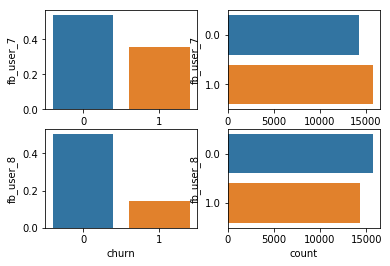

In [53]:
plt.subplot(2,2,1)
g = sns.barplot(y='fb_user_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.countplot(y='fb_user_7', data=churn_hv)

plt.subplot(2,2,3)
g = sns.barplot(y='fb_user_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.countplot(y='fb_user_8', data=churn_hv)

plt.show()

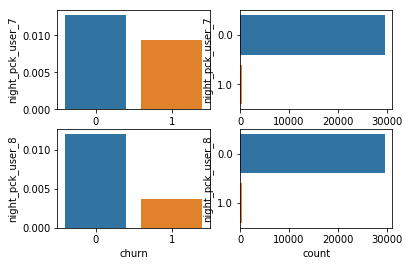

In [54]:
plt.subplot(2,2,1)
g = sns.barplot(y='night_pck_user_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.countplot(y='night_pck_user_7', data=churn_hv)

plt.subplot(2,2,3)
g = sns.barplot(y='night_pck_user_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.countplot(y='night_pck_user_8', data=churn_hv)

plt.show()

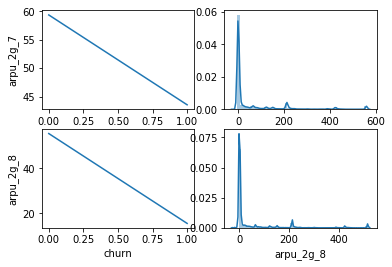

In [55]:
plt.subplot(2,2,1)
g = sns.lineplot(y='arpu_2g_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.distplot(churn_hv['arpu_2g_7'])

plt.subplot(2,2,3)
g = sns.lineplot(y='arpu_2g_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.distplot(churn_hv['arpu_2g_8'])

plt.show()

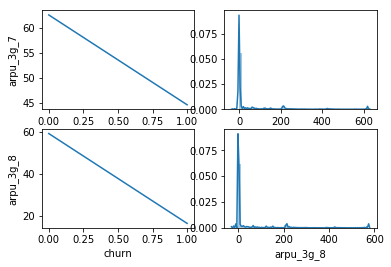

In [56]:
plt.subplot(2,2,1)
g = sns.lineplot(y='arpu_3g_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.distplot(churn_hv['arpu_3g_7'])

plt.subplot(2,2,3)
g = sns.lineplot(y='arpu_3g_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.distplot(churn_hv['arpu_3g_8'])

plt.show()

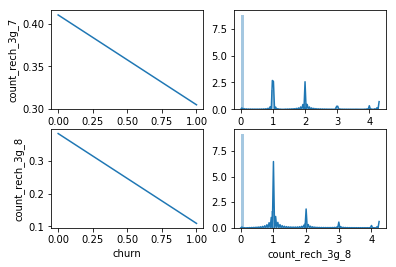

In [57]:
plt.subplot(2,2,1)
g = sns.lineplot(y='count_rech_3g_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.distplot(churn_hv['count_rech_3g_7'])

plt.subplot(2,2,3)
g = sns.lineplot(y='count_rech_3g_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.distplot(churn_hv['count_rech_3g_8'])

plt.show()

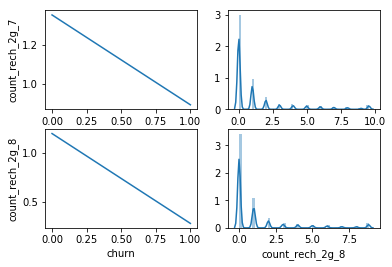

In [58]:
plt.subplot(2,2,1)
g = sns.lineplot(y='count_rech_2g_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.distplot(churn_hv['count_rech_2g_7'])

plt.subplot(2,2,3)
g = sns.lineplot(y='count_rech_2g_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.distplot(churn_hv['count_rech_2g_8'])

plt.show()

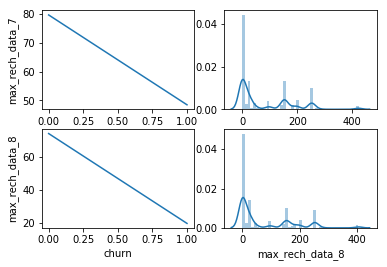

In [59]:
plt.subplot(2,2,1)
g = sns.lineplot(y='max_rech_data_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.distplot(churn_hv['max_rech_data_7'])

plt.subplot(2,2,3)
g = sns.lineplot(y='max_rech_data_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.distplot(churn_hv['max_rech_data_8'])

plt.show()

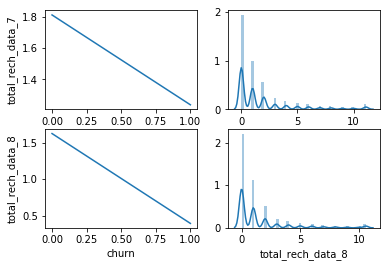

In [60]:
plt.subplot(2,2,1)
g = sns.lineplot(y='total_rech_data_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.distplot(churn_hv['total_rech_data_7'])

plt.subplot(2,2,3)
g = sns.lineplot(y='total_rech_data_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.distplot(churn_hv['total_rech_data_8'])

plt.show()

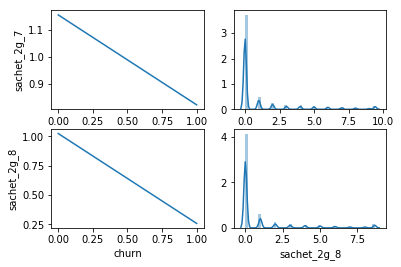

In [61]:
plt.subplot(2,2,1)
g = sns.lineplot(y='sachet_2g_7', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,2)
g = sns.distplot(churn_hv['sachet_2g_7'])

plt.subplot(2,2,3)
g = sns.lineplot(y='sachet_2g_8', x='churn', data=churn_hv, ci=None)
plt.subplot(2,2,4)
g = sns.distplot(churn_hv['sachet_2g_8'])

plt.show()

In [62]:
def stop_usage(x,y):
    if y<x:
        return(1)
    else:
        return(0)

In [63]:
churn_hv['stop_fb'] = churn_hv.apply(lambda x: stop_usage(x['fb_user_7'], x['fb_user_8']), axis=1)

In [64]:
churn_hv['stop_night_pack'] = churn_hv.apply(lambda x: stop_usage(x['night_pck_user_7'], x['night_pck_user_8']), axis=1)

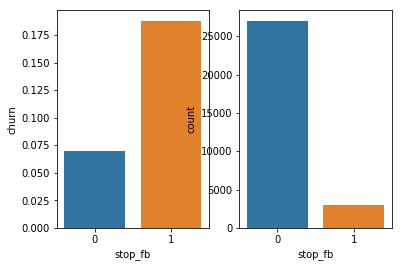

In [65]:
plt.subplot(1,2,1)
g = sns.barplot(x='stop_fb', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='stop_fb', data=churn_hv)

plt.show()

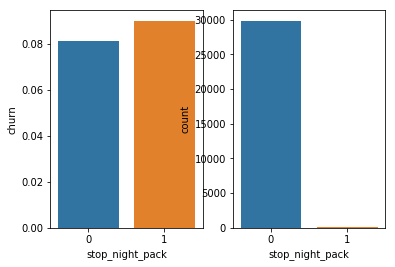

In [66]:
plt.subplot(1,2,1)
g = sns.barplot(x='stop_night_pack', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='stop_night_pack', data=churn_hv)

plt.show()

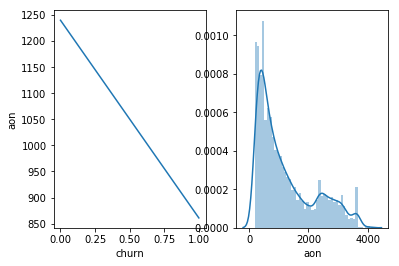

In [67]:
plt.subplot(1,2,1)
g = sns.lineplot(y='aon', x='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.distplot(churn_hv['aon'])

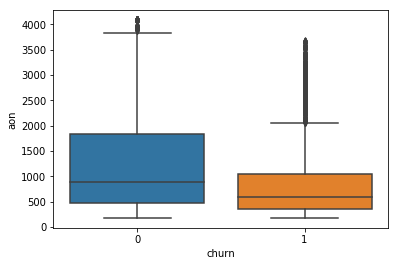

In [68]:
sns.boxplot(y='aon', x='churn', data=churn_hv)

In [69]:
churn_hv['arpu_drop'] = churn_hv['arpu_7'] - churn_hv['arpu_8']

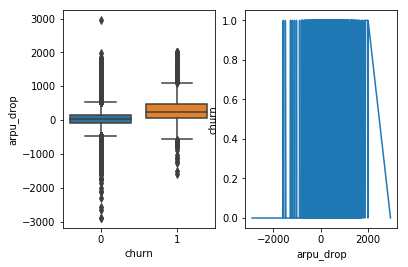

In [70]:
plt.subplot(1,2,1)
g = sns.boxplot(y='arpu_drop', x='churn', data=churn_hv)
plt.subplot(1,2,2)
g = sns.lineplot(x='arpu_drop', y='churn', data=churn_hv, ci=None)

plt.show()

In [71]:
churn_hv['arpu_drop'] = churn_hv.apply(lambda x: stop_usage(x['arpu_7'], x['arpu_8']), axis=1)

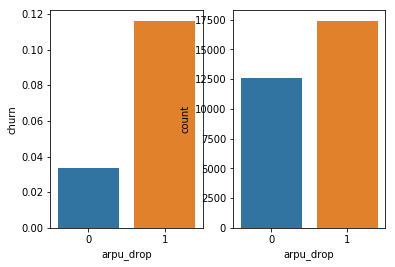

In [72]:
plt.subplot(1,2,1)
g = sns.barplot(x='arpu_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='arpu_drop', data=churn_hv)

plt.show()

In [73]:
churn_hv['og_drop'] = churn_hv.apply(lambda x: stop_usage(x['total_og_mou_7'], x['total_og_mou_8']), axis=1)

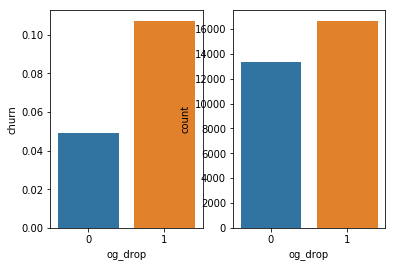

In [74]:
plt.subplot(1,2,1)
g = sns.barplot(x='og_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='og_drop', data=churn_hv)

plt.show()

In [75]:
churn_hv['ic_drop'] = churn_hv.apply(lambda x: stop_usage(x['total_ic_mou_7'], x['total_ic_mou_8']), axis=1)

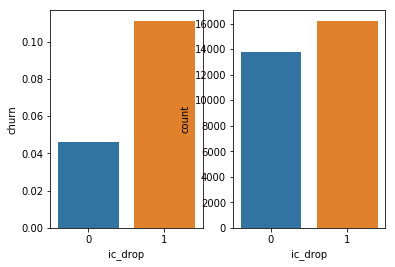

In [76]:
plt.subplot(1,2,1)
g = sns.barplot(x='ic_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='ic_drop', data=churn_hv)

plt.show()

In [77]:
churn_hv['2g_monthly_drop'] = churn_hv.apply(lambda x: stop_usage(x['monthly_2g_7'], x['monthly_2g_8']), axis=1)

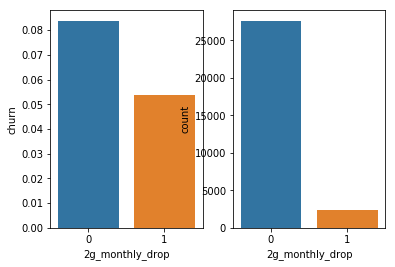

In [78]:
plt.subplot(1,2,1)
g = sns.barplot(x='2g_monthly_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='2g_monthly_drop', data=churn_hv)

plt.show()

In [79]:
churn_hv['2g_sach_drop'] = churn_hv.apply(lambda x: stop_usage(x['sachet_2g_7'], x['sachet_2g_8']), axis=1)

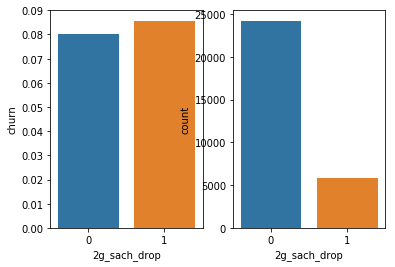

In [80]:
plt.subplot(1,2,1)
g = sns.barplot(x='2g_sach_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='2g_sach_drop', data=churn_hv)

plt.show()

In [81]:
churn_hv['2g_vol_drop'] = churn_hv.apply(lambda x: stop_usage(x['vol_2g_mb_7'], x['vol_2g_mb_8']), axis=1)

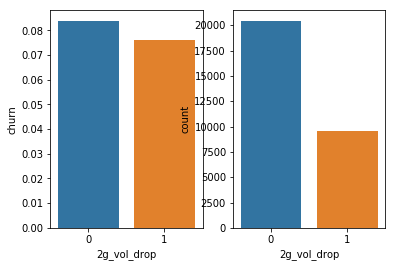

In [82]:
plt.subplot(1,2,1)
g = sns.barplot(x='2g_vol_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='2g_vol_drop', data=churn_hv)

plt.show()

In [83]:
churn_hv['3g_monthly_drop'] = churn_hv.apply(lambda x: stop_usage(x['monthly_3g_7'], x['monthly_3g_8']), axis=1)

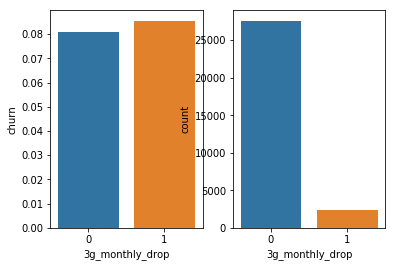

In [84]:
plt.subplot(1,2,1)
g = sns.barplot(x='3g_monthly_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='3g_monthly_drop', data=churn_hv)

plt.show()

In [85]:
churn_hv['3g_sach_drop'] = churn_hv.apply(lambda x: stop_usage(x['sachet_3g_7'], x['sachet_3g_8']), axis=1)

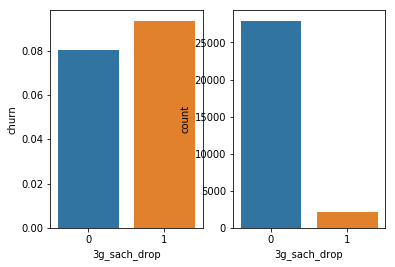

In [86]:
plt.subplot(1,2,1)
g = sns.barplot(x='3g_sach_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='3g_sach_drop', data=churn_hv)

plt.show()

In [87]:
churn_hv['3g_vol_drop'] = churn_hv.apply(lambda x: stop_usage(x['vol_3g_mb_7'], x['vol_3g_mb_8']), axis=1)

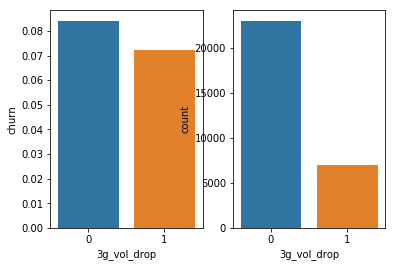

In [88]:
plt.subplot(1,2,1)
g = sns.barplot(x='3g_vol_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='3g_vol_drop', data=churn_hv)

plt.show()

In [89]:
churn_hv['3g_vbc_drop'] = churn_hv.apply(lambda x: stop_usage(x['vbc_3g_7'], x['vbc_3g_8']), axis=1)

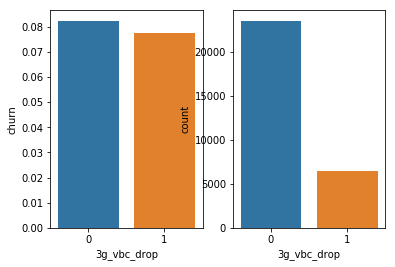

In [90]:
plt.subplot(1,2,1)
g = sns.barplot(x='3g_vbc_drop', y='churn', data=churn_hv, ci=None)
plt.subplot(1,2,2)
g = sns.countplot(x='3g_vbc_drop', data=churn_hv)

plt.show()

In [91]:
churn_hv.shape

(30001, 216)

In [92]:
cols_2g = churn_hv.columns[churn_hv.columns.str.contains('2g')]
churn_hv[cols_2g].describe()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,count_rech_2g_diff,vol_2g_mb_diff,arpu_2g_diff,monthly_2g_diff,sachet_2g_diff,2g_monthly_drop,2g_sach_drop,2g_vol_drop
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,1.154838,1.313783,1.118269,113.086272,110.827073,92.307893,57.549273,58.081521,52.193055,0.162924,0.170937,0.143327,0.976533,1.127113,0.961164,-0.112392,-20.329066,-5.840090,-0.025141,-0.085917,0.079597,0.193427,0.318923
std,2.087478,2.321347,2.085897,242.553112,240.204947,216.559541,119.991377,121.643848,114.481171,0.387602,0.400699,0.360263,2.073425,2.315554,2.066305,1.575302,187.565373,90.452403,0.322145,1.552352,0.270673,0.394991,0.466067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.320000,-15.480000,-24.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.744805,-788.228655,-354.755558,-1.086545,-5.688106,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-21.120000,-10.545000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,83.450000,77.770000,51.650000,50.670000,47.220000,26.900000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8.746928,9.576021,8.820308,1118.098039,1119.724779,1046.051917,546.456030,560.545860,516.263044,1.479331,1.534508,1.373066,8.587529,9.422362,8.662557,5.523946,748.435288,343.405358,1.036047,5.517745,1.000000,1.000000,1.000000


In [93]:
cols_3g = churn_hv.columns[churn_hv.columns.str.contains('3g')]
churn_hv[cols_3g].describe()

,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,count_rech_3g_diff,vol_3g_mb_diff,arpu_3g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff,3g_monthly_drop,3g_sach_drop,3g_vol_drop,3g_vbc_drop
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.379682,0.402048,0.360211,311.305166,334.676961,316.752732,60.039104,61.085785,55.751443,0.196945,0.205903,0.189431,0.162736,0.174137,0.148881,152.767750,161.311192,141.546168,5.496132,-0.037807,-9.372834,-5.318244,-0.015696,-0.025946,-1.232278,0.080697,0.069198,0.232159,0.214793
std,0.799779,0.860972,0.822780,631.273657,653.837231,645.999149,132.353530,134.405545,126.998370,0.492165,0.515367,0.490118,0.537108,0.589549,0.557654,321.410434,339.110849,310.330537,24.136798,0.672111,453.813936,99.125387,0.384737,0.504606,233.390555,0.272374,0.253794,0.422217,0.410685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-26.040000,-24.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.005304,-1880.335057,-397.918883,-1.434726,-2.629453,-947.845326,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.270000,-4.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,358.740000,410.700000,356.190000,35.000000,35.690000,20.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128.800000,137.290000,98.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.930594,4.305565,4.242847,3085.456215,3116.728659,3108.511217,604.481790,618.013725,573.284283,2.057325,2.206367,2.063642,3.166366,3.497225,3.502660,1432.040873,1509.483002,1408.707707,165.161866,2.948472,1868.867784,387.836882,1.409993,2.597354,948.726320,1.000000,1.000000,1.000000,1.000000


In [94]:
drop_cols = churn_hv.columns[churn_hv.columns.str.contains('arpu_3g|arpu_2g|count_3g|count_2g|max_rech_|_9')]

In [95]:
churn_hv.drop(drop_cols, axis=1, inplace=True)

In [96]:
churn_hv.shape

(30001, 198)

In [97]:
cor = churn_hv.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
corr_cols = pd.DataFrame(cor[(cor > 0.60) | (cor < -0.60)].sort_values())

In [98]:
corr_cols_list = list(corr_cols.index)

churn_hv.shape

(30001, 198)

In [99]:
corr_cols_list

[('og_others_diff', 'og_others_6'),
 ('total_og_mou_6', 'std_og_t2t_mou_6'),
 ('total_og_mou_7', 'onnet_mou_8'),
 ('sachet_2g_8', 'sachet_2g_6'),
 ('sachet_3g_8', 'sachet_3g_7'),
 ('loc_ic_mou_8', 'loc_ic_t2t_mou_7'),
 ('loc_ic_mou_8', 'loc_og_mou_8'),
 ('Int_usage', 'vol_3g_mb_7'),
 ('count_rech_3g_7', 'count_rech_3g_6'),
 ('std_ic_t2f_mou_7', 'std_ic_t2f_mou_6'),
 ('vol_3g_mb_7', 'count_rech_3g_7'),
 ('monthly_3g_7', 'monthly_3g_6'),
 ('std_og_mou_8', 'std_og_t2m_mou_7'),
 ('total_og_mou_7', 'std_og_mou_6'),
 ('total_rech_num_diff', 'arpu_diff'),
 ('std_ic_t2f_mou_8', 'std_ic_t2f_mou_7'),
 ('total_ic_mou_8', 'loc_ic_t2m_mou_6'),
 ('total_og_mou_7', 'std_og_t2t_mou_7'),
 ('sachet_2g_7', 'total_rech_data_6'),
 ('std_og_t2m_mou_6', 'offnet_mou_7'),
 ('count_rech_2g_7', 'total_rech_data_6'),
 ('offnet_mou_diff', 'arpu_diff'),
 ('std_og_t2m_mou_7', 'offnet_mou_8'),
 ('total_ic_mou_6', 'loc_ic_t2m_mou_8'),
 ('loc_og_t2c_mou_diff', 'loc_og_t2c_mou_8'),
 ('offnet_mou_8', 'offnet_mou_6'),
 ('

In [100]:
#churn_hv_bak = churn_hv
drop_cols = []

In [101]:
for i in corr_cols_list:
    drop_cols.append(i[1])

In [102]:
#churn_hv.drop(drop_cols, axis=1, inplace=True)

In [103]:
churn_hv.shape

(30001, 198)

In [104]:
cor = churn_hv.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
corr_cols = pd.DataFrame(cor[(cor > 0.40) | (cor < -0.40)].sort_values())

In [105]:
corr_cols_list = list(corr_cols.index)

In [106]:
corr_cols

,,0
og_others_diff,og_others_6,-0.921408
2g_monthly_drop,monthly_2g_diff,-0.587450
arpu_drop,arpu_diff,-0.574472
3g_monthly_drop,monthly_3g_diff,-0.517394
roam_og_mou_diff,roam_og_mou_6,-0.516791
roam_ic_mou_diff,roam_ic_mou_6,-0.512820
spl_ic_mou_diff,spl_ic_mou_6,-0.510374
3g_sach_drop,sachet_3g_diff,-0.486551
ic_drop,total_ic_mou_diff,-0.485316
2g_sach_drop,sachet_2g_diff,-0.476546


In [107]:
plt.figure(figsize = (20,10))  
#sns.heatmap(churn_hv.corr(),annot = True)
#plt.show()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [108]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_hv.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_hv['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [109]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_cols = X.columns


In [110]:
X.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,CustVal,recharge_del_67,recharge_del_78,CallUsage,Int_usage,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,last_day_rch_amt_diff,total_rech_data_diff,count_rech_2g_diff,count_rech_3g_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,vbc_3g_diff,total_rech_data_amt_diff,stop_fb,stop_night_pack,arpu_drop,og_drop,ic_drop,2g_monthly_drop,2g_sach_drop,2g_vol_drop,3g_monthly_drop,3g_sach_drop,3g_vol_drop,3g_vbc_drop
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30

In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [119]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38618, 196)
(38618,)


In [120]:
100*y_tr.sum()/len(y_tr)

50.0

In [121]:
100*y_train.sum()/len(y_train)

8.052380952380952

In [122]:
y_test.sum()/y_test.count()

0.08332407510276636

In [123]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [124]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38618, 196)
(9001, 196)


In [125]:
print(X_train.shape)

print(y_train.shape)

(21000, 196)
(21000,)


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [127]:
y_pred_df.head()

,0
0,1
1,1
2,0
3,0
4,1


In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8224   27]
 [ 193  557]]


In [129]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.9755582713031885


In [130]:
col = list(X_cols)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.115189,0.081582,0.073233,arpu_6
1,0.067871,0.135866,0.014396,arpu_7
2,-0.040052,0.199186,-0.059297,arpu_8
3,0.146147,0.045583,-0.040554,onnet_mou_6
4,0.109761,0.077653,-0.073734,onnet_mou_7
5,0.021847,0.115950,-0.092893,onnet_mou_8
6,0.149548,0.081422,0.061499,offnet_mou_6
7,0.109279,0.118080,0.005041,offnet_mou_7
8,0.005266,0.159494,-0.048996,offnet_mou_8
9,-0.001476,0.024829,-0.068236,roam_ic_mou_6


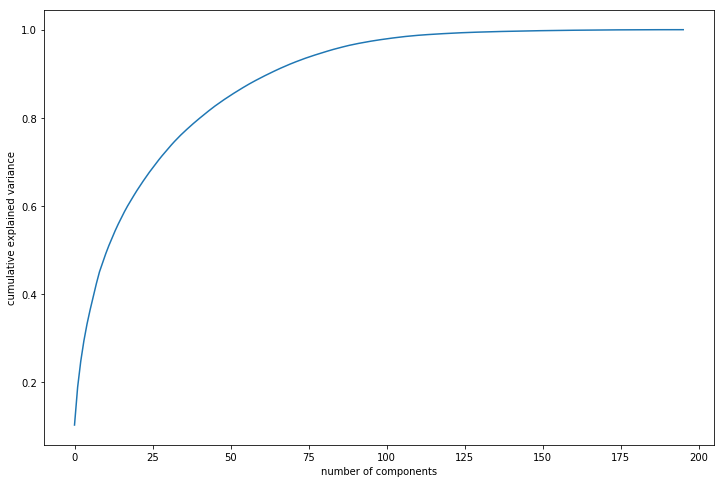

In [131]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [164]:
pca_10 = PCA(n_components=80)

df_tr_pca_10 = pca_10.fit_transform(X_tr)
print(df_tr_pca_10.shape)

df_test_pca_10 = pca_10.transform(X_test)
print(df_test_pca_10.shape)

(38618, 80)
(9001, 80)


In [165]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_10, y_tr)

# Predicted probabilities
y_pred10 = lr_pca1.predict(df_test_pca_10)


# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred10)

In [166]:
print(confusion_matrix(y_test,y_pred10))

[[7738  513]
 [ 314  436]]


In [167]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred10))

Logistic Regression accuracy with PCA:  0.9081213198533497


In [168]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
grid = {'C': [0.1, 1, 2, 5], "penalty":["l1","l2"]}# l1 lasso l2 ridge


# specify model
model_lr = LogisticRegression()

# set up GridSearchCV()
modellr_cv = GridSearchCV(model_lr, grid ,cv=5, scoring='accuracy', return_train_score= True)      

# fit the model
modellr_cv.fit(df_tr_pca_10, y_tr)                                  


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 2, 5], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [169]:
print("tuned hpyerparameters :(best parameters) ", modellr_cv.best_params_)
print("accuracy :",modellr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 2, 'penalty': 'l1'}
accuracy : 0.8731938474286602


In [154]:
# scores of GridSearch CV
scores = modellr_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.642311,0.319088,0.003391,0.000489,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.975531,0.976049,0.974495,0.976567,0.975654,0.975659,0.000685,7,0.976597,0.976403,0.976565,0.976241,0.976275,0.976416,0.000145
1,1.318082,0.037205,0.003186,0.000403,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.964526,0.965691,0.966339,0.967763,0.964258,0.965715,0.001274,8,0.966952,0.967113,0.966854,0.966498,0.966986,0.966881,0.000208
2,27.557893,1.315268,0.003789,0.000747,1,l1,"{'C': 1, 'penalty': 'l1'}",0.984982,0.985629,0.984982,0.987183,0.986273,0.985810,0.000837,3,0.987214,0.986405,0.986502,0.986081,0.986568,0.986554,0.000370
3,2.039546,0.053816,0.002792,0.000399,1,l2,"{'C': 1, 'penalty': 'l2'}",0.979415,0.978897,0.977602,0.979285,0.978891,0.978818,0.000643,6,0.979640,0.979284,0.979252,0.979155,0.979188,0.979304,0.000174
4,40.150564,5.064697,0.002992,0.000002,2,l1,"{'C': 2, 'penalty': 'l1'}",0.985241,0.986535,0.986147,0.987830,0.987309,0.986612,0.000902,2,0.988024,0.987311,0.987441,0.987279,0.987506,0.987512,0.000269


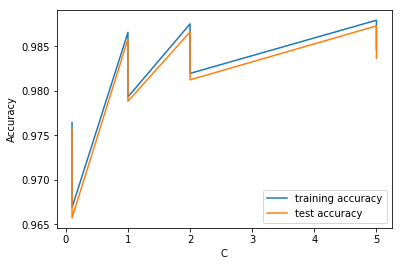

In [155]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [156]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [157]:
# predict
predictions_lr = modellr_cv.predict(df_test_pca_10)

In [158]:
print("Logistic Regression accuracy with PCA after Grid Search optimization: ",accuracy_score(y_test,predictions_lr))

Logistic Regression accuracy with PCA after Grid Search optimization:  0.9355627152538607


In [159]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [160]:
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8251
           1       0.95      0.24      0.38       750

    accuracy                           0.94      9001
   macro avg       0.94      0.62      0.67      9001
weighted avg       0.94      0.94      0.92      9001



In [161]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_lr))

[[8241   10]
 [ 570  180]]


In [162]:
print(accuracy_score(y_test,predictions_lr))

0.9355627152538607


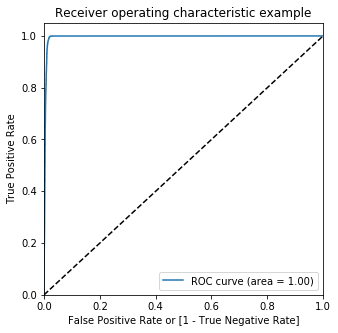

In [163]:
# predict
train_y_lr = modellr_cv.predict_proba(df_tr_pca_10)[:,1]
draw_roc(y_tr, train_y_lr)

In [141]:
# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
modelrf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [142]:
# Fit the grid search to the data
modelrf_cv.fit(df_tr_pca_10, y_tr)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 26.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [143]:
# scores of GridSearch CV
scores = modelrf_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,15.571391,0.198828,0.360936,0.110306,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.849153,0.855190,0.851616,0.851986,0.002478,60
1,22.860029,3.176513,0.424370,0.018805,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.850940,0.861715,0.856976,0.856544,0.004410,52
2,26.095583,2.013552,0.468787,0.022198,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.850707,0.858996,0.862104,0.857269,0.004811,48
3,8.027350,0.246455,0.184717,0.020256,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.851561,0.860705,0.858919,0.857061,0.003957,50
4,15.601898,0.024622,0.342047,0.017271,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.853037,0.859229,0.857054,0.856440,0.002565,53


In [145]:
# Making predictions
predictions = modelrf_cv.predict(df_test_pca_10)

In [146]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [147]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8251
           1       1.00      0.01      0.02       750

    accuracy                           0.92      9001
   macro avg       0.96      0.51      0.49      9001
weighted avg       0.92      0.92      0.88      9001



In [148]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8251    0]
 [ 741    9]]


In [149]:
print(accuracy_score(y_test,predictions))

0.9176758137984669


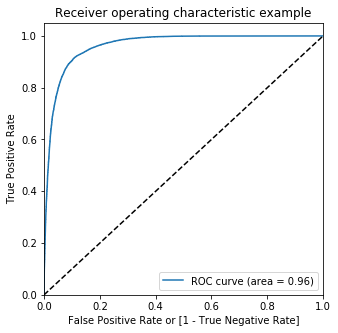

In [150]:
train_y_rf = modelrf_cv.predict_proba(df_tr_pca_10)[:,1]
draw_roc(y_tr, train_y_rf)